# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer #?
import statsmodels.api as sm #?


# 2. Load data

In [10]:
data = pd.read_csv('spamsms-1.csv',encoding = 'latin-1')
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis = 1, inplace=True)
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
type    5572 non-null object
text    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
data.type.unique() #Type is a categorical variable with values ham and spam

array(['ham', 'spam'], dtype=object)

# 3. Exploring and preparing the data 

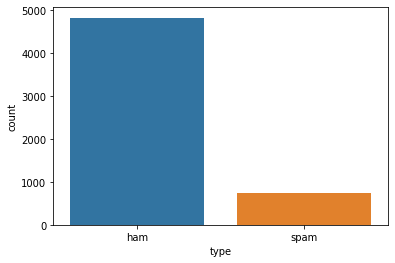

In [13]:
sns.countplot(data.type)

In [14]:
i = 0
x = np.zeros(len(data.type))
for str in data.text:
    x[i] = len(str)
    i = i + 1
    
data['length'] = x

data.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0


## a) Find the distribution of target variable (Class) 


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
type      5572 non-null object
text      5572 non-null object
length    5572 non-null float64
dtypes: float64(1), object(2)
memory usage: 130.7+ KB


## b) Plot the distribution of target variable using histogram

(array([4825.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

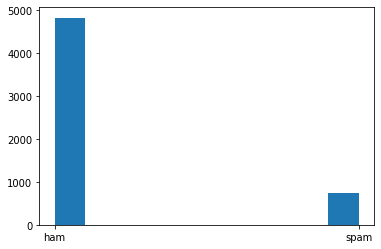

In [15]:
plt.hist(data['type'])

## c) Summary Statistics and explain insights for at least 2 variables

In [18]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0


**type**: categorical variable or target variable containing 2 values, ham,spam

**text**: string text variable 

**length**: length of text value in each row

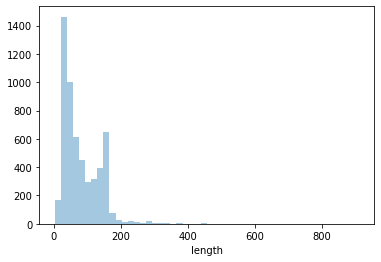

In [25]:
sns.distplot(data.length, kde=False)

# 4. Create training and test datasets

In [29]:
X = data.text
Y = data.type

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.25, random_state = 1)

print(len(x_train))
print(len(x_test))

4179
1393


# 5. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


Here, as this the dataset which requires some Text Analytics. This might not yet come into your notice, hence giving the 
solution for the reference. This may be helpful in the future concepts.

We want to find the frequencies of words in the spam and non-spam messages. The words of the messages will be model features.

In [31]:
#Data preparation – splitting text documents into words
def text_process (x):
    return x.split()
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['text'])
print(len(bow_transformer.vocabulary_))

15585


In [32]:
print(bow_transformer.get_feature_names()[0])
print(bow_transformer.get_feature_names()[8555])

!
february


# 6. Create indicator features for frequent words

In [34]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4179, 15585)


# 7. Train a model on the data

In [35]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, y_train)

# 8. Evaluate model performance

In [48]:
messages_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1393, 15585)


In [37]:
y_pred = spam_detect_model.predict(messages_tfidf)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [42]:
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))

confusion_matrix
[[1213   77]
 [   0  103]]


# 9. Measure performance for classifcation

In [44]:
df_table = confusion_matrix(y_test,y_pred)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.94
precision:  1.0
recall   :  0.57
F1 score :  0.73
